Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 09

## Introduction

This week's sheet should be solved and handed in before **2:00pm of Tuesday, June 22, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

The second half of this sheet will be a recap of previous topics, to help you prepare for the final exam (a second recap will follow on the last exercise sheet, that is sheet 12).

If you hit any question that should be discussed in more detail in the next practice session, please let us know.

## Assignment 0: Math recap (Conditional Probability) [0 Points]

This exercise is supposed to be very easy and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** Explain the idea of conditional probability. How is it defined?

YOUR ANSWER HERE

**b)** What is Bayes' theorem? What are its applications?

YOUR ANSWER HERE

**c)** What does the law of total probability state? 

YOUR ANSWER HERE

## Assignment 1: MLP and RBFN [10 Points]

This exercise is aimed at deepening the understanding of Radial Basis Function Networks and how they relate to Multilayer Perceptrons. Not all of the answers can be found directly in the slides - so when answering the (more algorithmic) questions, first take a minute and think about how you would go about solving them and if nothing comes to mind search the internet for a little bit. If you are interested in a real life application of both algorithms and how they compare take a look at this paper: [Comparison between Multi-Layer Perceptron and Radial Basis Function Networks for Sediment Load Estimation in a Tropical Watershed](http://file.scirp.org/pdf/JWARP20121000014_80441700.pdf)

![Schematic of a RBFN](RBFN.png)

We have prepared a little example that shows how radial basis function approximation works in Python. This is not an example implementation of a RBFN but illustrates the work of the hidden neurons.

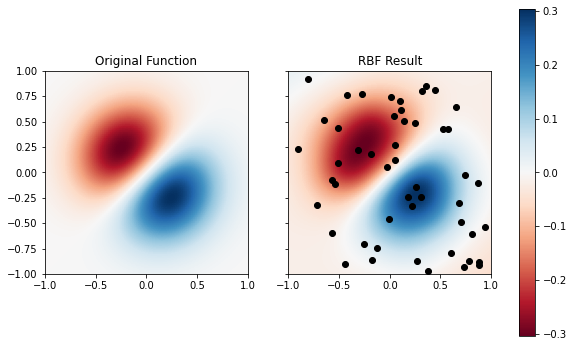

In [2]:
%matplotlib inline
import numpy as np
from numpy.random import uniform

from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


def func(x, y):
    """
    This is the example function that should be fitted.
    Its shape could be described as two peaks close to
    each other - one going up, the other going down
    """
    return (x + y) * np.exp(-4.0 * (x**2 + y**2))


# number of training points (you may try different values here)
training_size = 50

# sample 'training_size' data points from the input space [-1,1]x[-1,1] ...
x = uniform(-1.0, 1.0, size=training_size)
y = uniform(-1.0, 1.0, size=training_size)

# ... and compute function values for them.
fvals = func(x, y)

# get the aprroximation via RBF
new_func = Rbf(x, y, fvals)


# Plot both functions:
# create a 100x100 grid of input values
x_grid, y_grid = np.mgrid[-1:1:100j, -1:1:100j]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))
# This plot represents the original function
f_orig = func(x_grid, y_grid)
img = ax[0].imshow(f_orig, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[0].set(title='Original Function')
# This plots the approximation of the original function by the RBF
# if the plot looks strange try to run it again, the sampling
# in the beginning is random
f_new = new_func(x_grid, y_grid)
plt.imshow(f_new, extent=[-1, 1, -1, 1], cmap='RdBu')
ax[1].set(title='RBF Result', xlim=[-1, 1], ylim=[-1, 1])
# scatter the datapoints that have been used by the RBF
plt.scatter(x, y, color='black')
fig.colorbar(img, ax=ax)
plt.show()

### Radial Basis Function Networks

#### What are radial basis functions?

### Answer: 

A radial basis function (RBF) is a real-valued function, whose  **𝜙**  value depends only on the distance between the input and some fixed point, either the origin  **𝜙(𝐱)=𝜙(‖𝐱‖)** or **𝜙(𝐱,𝐜)=𝜙(‖𝐱−𝐜‖)**.  Any function **𝜙** that satisfies the property **𝜙(𝐱)=𝜙(‖𝐱‖)** is a radial function. The distance is usually Euclidean distance. 

#### What is the structure of a RBFN? You may also use the notion from the above included picture.

### Answer:

RBFN's are networks that contain sigle layer of units/nurones (hidden). The inputs are connected to all the hidden units. Activation of a neuron works according to the matchs between inputs and weights and this function is unimodal(usually Gaussian). The output is then a linear combination of the outpus ot those functions.

#### How is a RBFN trained?

### Answer: 



Unlike in MLPs, the hidden and output layers in RBF networks operate in very different ways, and the corresponding “weights” have very different meanings and properties. It is therefore appropriate to use different learning algorithms for them.

The input to hidden “weights” (i.e., basis function parameters {µij ,σj}) can be trained (or set) using any one of several possible unsupervised learning techniques.

Then, after the input to hidden “weights” are found, they are kept fixed while the hidden to output weights are learned.

This second stage of training only involves a single layer of weights {wjk} and linear output activation functions.

### Comparison to the Multilayer Perceptron

#### What do both models have in common? Where do they differ?

### Answer: 

|    |RBFN                 |MLP                  | 
|----------------|---------------------|---------------------|
|feedforward network| non-linear and layered|non-linear and layered| 
|activation function| hidden neurons use radial basis functions, output neurons use linear function|all the layers usees the same activation function| 
|Training| weights are updated only on the final layer corrosponfing to output.  | weights are updated throught the network|
|Leraning speed|Faster, as it has only single hidden layer|Slower, as it has to train and updates its multiple hidden layers|


#### How can classification in both networks be visualized?

### Answer: 

<img src="mlp_vs_rbf.jpeg">

[source: https://towardsdatascience.com/radial-basis-functions-neural-networks-all-we-need-to-know-9a88cc053448]

#### When would you use a RBFN instead of a Multilayer Perceptron?

### Answer: 

We may use RBF networks in case we do not necessarily need to have multiple hidden layers in our model and want our model to be robust to adversarial noise/examples.

The advantage of RBF networks is they bring much more robustness to our prediction but they are more limited compared to commonly-used types of neural networks. However, commonly-used types of neural network models are highly vulnerable to adversarial noise and can make very wrong predictions when fed with such examples as their inputs. This is not the case in RBF networks which seems to be due to their non-linear nature of these networks.

So it is a trade-off between higher accuracy in commonly-used types of neural networks or higher robustness in radial-basis function networks.

## Recap 1: Concept Learning [2 Points]

### a) Concept Learning

What is Concept Learning? Is it supervised? Is it local?

YOUR ANSWER HERE

### b) Find-S
Describe the Find-S Algorithm in pseudo code. What is its inductive bias? What are its advantages and drawbacks?

YOUR ANSWER HERE

### c) Hypotheses space

What is the hypotheses space for Candidate-Elimination used in the lecture?

YOUR ANSWER HERE

## Recap 2: Decision Trees [2 Points]

### a) Overfitting
What is overfitting? How can it be avoided?

YOUR ANSWER HERE

### b) Pruning

Name one method for pruning a decision tree and describe it!

YOUR ANSWER HERE

### c) Information gain
What are entropy and information gain? Provide explanation and formulae. How are they used in ID3?

YOUR ANSWER HERE

## Recap 3: Data Mining [2 Points]

### a) Missing values

How can you deal with missing values? Name an important algorithm and explain how to use it.

YOUR ANSWER HERE

### b) Outliers

What are outliers? Can we detect them? If so, how?

YOUR ANSWER HERE

### c) Expectation Maximization
What does the Q-function express in the EM algorithm?

YOUR ANSWER HERE

## Recap 4: Clustering [4 Points]

### a) Clustering

Explain the difference between single-linkage and complete-linkage clustering.

YOUR ANSWER HERE

### b) Metrics

Name three different distance measures and briefly explain them. Check the metric axioms for one of them.

YOUR ANSWER HERE

### c) Mixture models

What is a mixture model? Explain. Can you provide a formula?

YOUR ANSWER HERE

## Recap 5: Dimension Reduction [2 Points]

### a) Visualization

Name three different data visualization techniques to visualize high dimensional data. Explain one in detail.

YOUR ANSWER HERE

### b) PCA

Draw a few data points (ASCII arts or on a sheet of paper) and mark the principal components. What are the principal components?

YOUR ANSWER HERE

### c) Covariance matrix
What does a covariance matrix express? How is it computed from data? How is it used in PCA?

YOUR ANSWER HERE